In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [18]:
df = pd.read_csv('/content/drive/MyDrive/songs.csv')
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [19]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [21]:
df = df[df['year'] > 2002]

In [22]:
df.shape

(35656, 19)

In [23]:
df1=df.drop_duplicates(keep='last', subset=['name', 'artists'])

In [24]:
df1.shape

(33735, 19)

In [30]:
df2 = df.sort_values(['name', 'artists'])

# Create a new column that combines 'name' and 'artists' columns
df2['name_artist'] = df2['name'] + '_' + df2['artists']

# Get the duplicated rows based on the 'name_artist' column
duplicates = df2[df2.duplicated('name_artist', keep=False)]

# Reset the index of the duplicates DataFrame
duplicates = duplicates.reset_index(drop=True)
duplicates

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,name_artist
0,0.00614,['Fall Out Boy'],0.609,213587,0.917,0,3rG8ZkmKHb4Ms6CsSzEITv,0.00002,9,0.0775,-2.563,1,"""The Take Over, The Breaks Over""",57,2007-01-01,0.0477,149.948,0.6700,2007,"""The Take Over, The Breaks Over""_['Fall Out Boy']"
1,0.00614,['Fall Out Boy'],0.609,213587,0.917,0,4zCfMDdf5QXPKEqxdinXvB,0.00002,9,0.0775,-2.563,1,"""The Take Over, The Breaks Over""",51,2007-02-06,0.0477,149.948,0.6700,2007,"""The Take Over, The Breaks Over""_['Fall Out Boy']"
2,0.00591,"['$uicideBoy$', 'Pouya']",0.798,169169,0.529,1,5NXeprz7VhJkG6RgSAqqeO,0.39400,1,0.0720,-6.327,1,$outh $ide $uicide,52,2015-09-01,0.0740,109.995,0.0524,2015,"$outh $ide $uicide_['$uicideBoy$', 'Pouya']"
3,0.00538,"['$uicideBoy$', 'Pouya']",0.797,169320,0.516,1,4VsMart0lkjUtyQnmxloK6,0.43100,1,0.0728,-6.286,1,$outh $ide $uicide,69,2015-06-15,0.0831,109.997,0.0477,2015,"$outh $ide $uicide_['$uicideBoy$', 'Pouya']"
4,0.21300,"['Billie Eilish', 'Vince Staples']",0.776,179016,0.379,0,6X7qcg95CAeJpTjtg1wooM,0.00175,9,0.0969,-9.351,0,&burn (with Vince Staples),65,2017-12-22,0.3310,82.531,0.3460,2017,"&burn (with Vince Staples)_['Billie Eilish', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,0.07370,['Travis Scott'],0.769,216946,0.569,1,1cZlBZwnwGPtYeRIeQcoFh,0.00000,1,0.0571,-5.591,0,wonderful,71,2016-09-16,0.0786,146.062,0.6120,2016,wonderful_['Travis Scott']
3660,0.96400,['Joji'],0.577,126312,0.387,1,0baNzeUcPQnQSagpe8T0mD,0.70500,7,0.2080,-8.607,1,worldstar money (interlude),62,2018-02-14,0.2740,146.565,0.4590,2018,worldstar money (interlude)_['Joji']
3661,0.96400,['Joji'],0.577,126312,0.387,1,435yU2MvEGfDdmbH0noWZ0,0.70500,7,0.2080,-8.607,1,worldstar money (interlude),66,2017-11-03,0.2740,146.565,0.4590,2017,worldstar money (interlude)_['Joji']
3662,0.03760,"['Luis Fonsi', 'Demi Lovato']",0.733,173720,0.892,0,2hl6q70unbviGo3g1R7uFx,0.00000,0,0.1370,-3.641,1,Échame La Culpa,67,2017-11-17,0.0417,95.989,0.6750,2017,"Échame La Culpa_['Luis Fonsi', 'Demi Lovato']"


In [31]:
numeric_data = df1[['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year']]
categorical_data = df1[['artists', 'id', 'name', 'release_date']]

In [33]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=numeric_data['acousticness'],name='Acousticness'))
fig.add_trace(go.Box(y=numeric_data['energy'],name='Energy'))
fig.add_trace(go.Box(y=numeric_data['danceability'],name='Danceability'))
fig.add_trace(go.Box(y=numeric_data['liveness'],name='liveness'))
fig.show()

In [34]:
categorical_data['artists'].value_counts().head(10)

artists
['Taylor Swift']     126
['Drake']            107
['BTS']              103
['Eminem']            98
['Mac Miller']        97
['One Direction']     87
['Kanye West']        86
['John Mayer']        86
['Jack Johnson']      80
['George Strait']     76
Name: count, dtype: int64

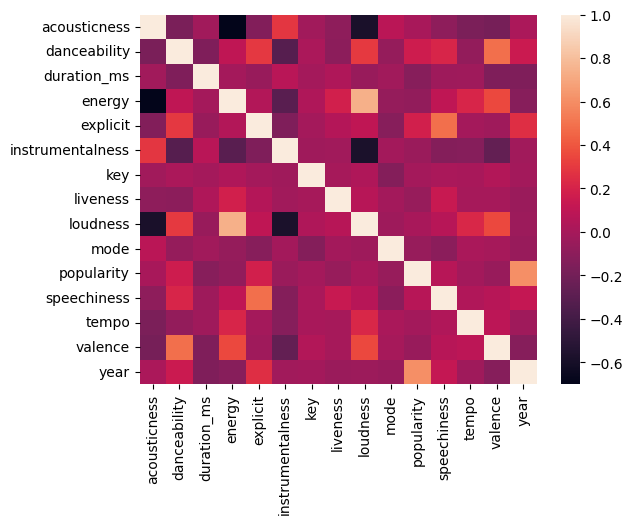

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix=numeric_data.corr()
sns.heatmap(corrMatrix)
plt.show()

In [64]:
features = ['danceability', 'energy', 'valence', 'loudness']
X = MinMaxScaler().fit_transform(df1[features])
kmeans = KMeans(init="k-means++", n_clusters=4, random_state=15).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [65]:
df1['kmeans'] = kmeans.labels_
df1

<ipython-input-65-fde2c68bdb3d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,kmeans
6354,0.1250,['Dierks Bentley'],0.528,228438,0.871,0,3bvr2R5FUjrC3orh47Qe5V,0.000000,9,0.2300,-8.010,1,How Am I Doin',42,2003-01-01,0.1220,181.903,0.675,2003,2
6355,0.1250,['Beyoncé'],0.711,260200,0.454,0,1qgNiHh7QoSgzoFZEPwPNm,0.000002,0,0.0710,-6.485,0,Be With You,43,2003-06-24,0.0904,74.928,0.782,2003,2
6356,0.3310,['Muddy Waters'],0.333,292373,0.603,0,2PatEYrrVBNx5LPjTL2ruP,0.026800,0,0.9820,-8.339,1,Champagne & Reefer - Live,47,2003-09-02,0.1760,207.800,0.525,2003,0
6357,0.1230,['Los Nietos'],0.790,238120,0.526,0,27188WhdFnBQXf1MzjIIAS,0.000000,11,0.0835,-6.978,1,Coqueta,50,2003-01-01,0.0280,94.872,0.748,2003,2
6358,0.1180,"[""Los Player's""]",0.526,149420,0.682,0,34AiUmehAG6OuMpa3efrZg,0.000058,11,0.5170,-6.392,1,Tu Mirada,43,2003-01-01,0.0363,140.395,0.894,2003,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020,1
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020,1
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020,1
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020,0


In [66]:
df1['kmeans'].value_counts()

kmeans
2    11781
1     9086
0     8885
3     3983
Name: count, dtype: int64

In [67]:
cluster = df1.groupby(by=df1['kmeans'])
print(cluster.size())

kmeans
0     8885
1     9086
2    11781
3     3983
dtype: int64


In [68]:
y=df1.pop('kmeans')
x = df1.drop(columns=['name','artists','id','release_date','name'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [69]:
from lightgbm import LGBMClassifier
model=LGBMClassifier().fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2656
[LightGBM] [Info] Number of data points in the train set: 25301, number of used features: 15
[LightGBM] [Info] Start training from score -1.339994
[LightGBM] [Info] Start training from score -1.313186
[LightGBM] [Info] Start training from score -1.047718
[LightGBM] [Info] Start training from score -2.133232


In [70]:
model.score(x_train,y_train)

1.0

In [71]:
model.score(x_test,y_test)

0.9870761204647854

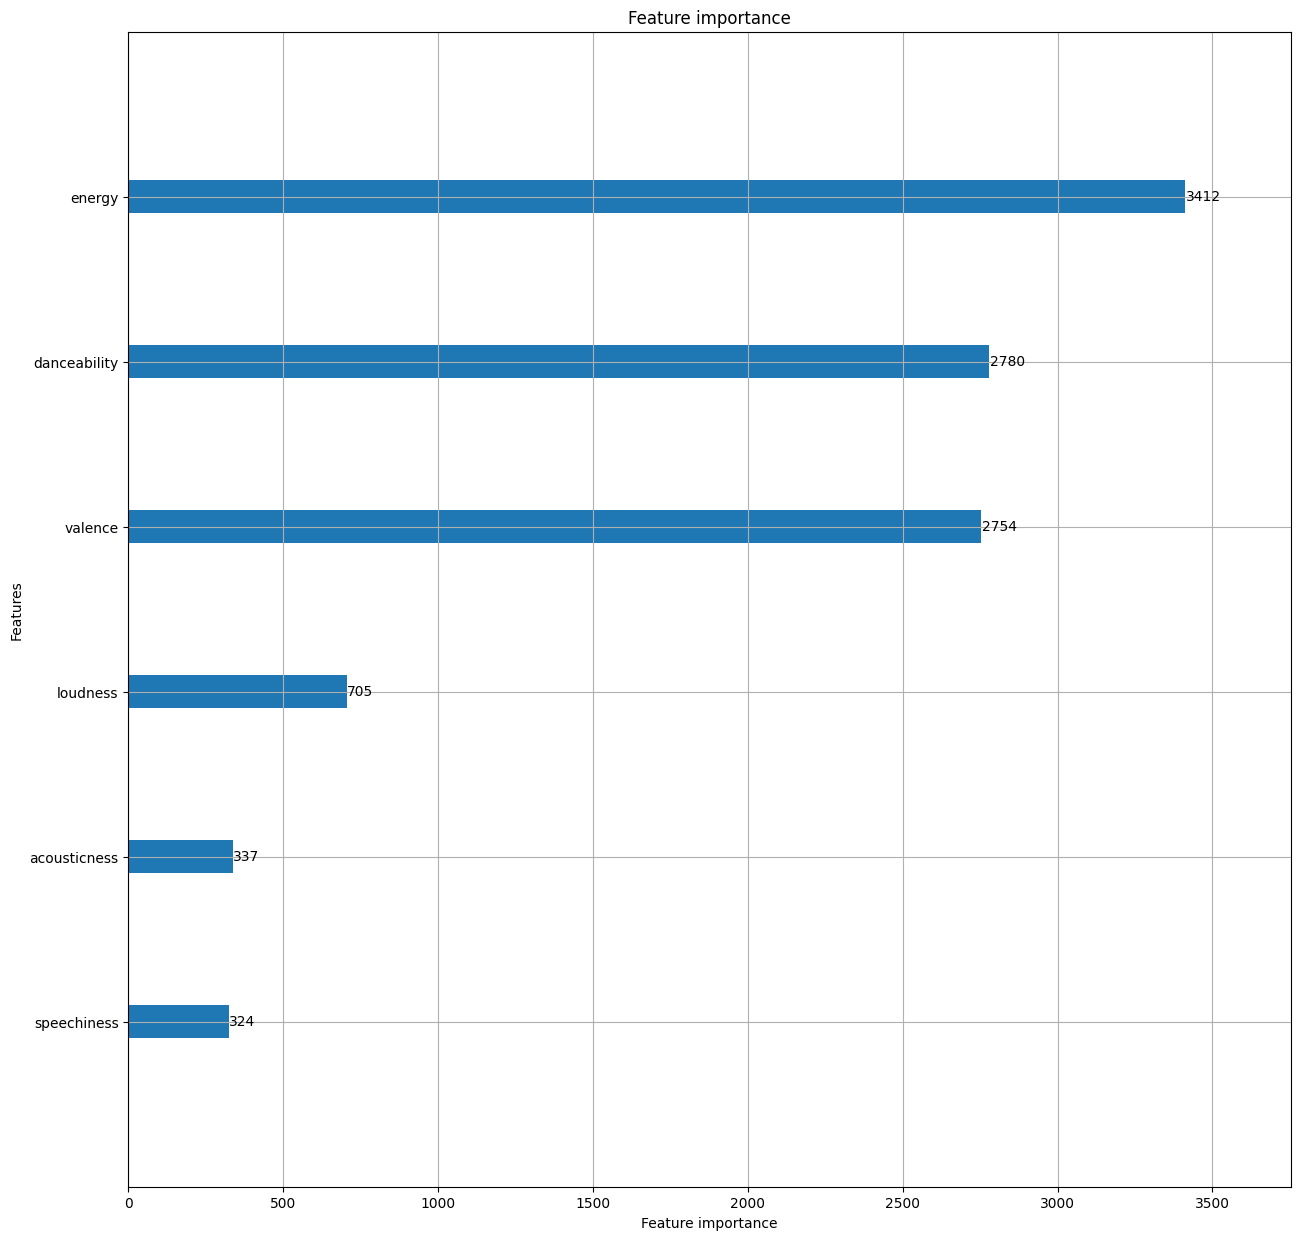

In [72]:
import lightgbm
import matplotlib.pyplot as plt
ax = lightgbm.plot_importance(model, max_num_features=6, figsize=(15,15))
plt.show()

In [73]:
data = cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
data.reset_index(level=0, inplace=True)

In [74]:
data

,kmeans,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0,0.00146,['The Weeknd'],0.514,200040,0.7300,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.3340,2020
87852,0,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.7740,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.3300,2019
88029,0,0.00346,"['Sam Smith', 'Demi Lovato']",0.501,200838,0.6740,0,1fipvP2zmef6vN2IwXfJhY,0.000036,5,0.2820,-6.363,1,I’m Ready (with Demi Lovato),86,2020-04-16,0.0408,155.051,0.1520,2020
126215,0,0.17700,"['Robin Schulz', 'Alida']",0.570,208222,0.6720,0,61ZM92T2zaXIVsqncThQzC,0.000000,8,0.0768,-5.890,0,In Your Eyes (feat. Alida),86,2020-01-10,0.0723,120.019,0.4480,2020
87853,0,0.06870,"['Juice WRLD', 'YoungBoy Never Broke Again']",0.474,189323,0.6310,1,6Gg1gjgKi2AK4e0qzsR7sd,0.000000,5,0.1320,-5.884,0,Bandit (with YoungBoy Never Broke Again),86,2019-10-04,0.3430,180.051,0.4250,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135529,3,0.71000,['Sebastian Yatra'],0.347,228080,0.3530,0,6SAGMDYU1gPyfdtg1WSP8Y,0.000000,0,0.3100,-7.321,1,Como Mirarte,0,2020-06-12,0.0341,172.983,0.2010,2020
169826,3,0.92100,['ROSALÍA'],0.442,214012,0.2670,0,76WMWYa1iqRTHZotPuuEuc,0.000017,6,0.1210,-9.640,0,Catalina,0,2020-06-05,0.0582,78.171,0.3220,2020
55586,3,0.99500,"['Johann Sebastian Bach', 'Lucas Jussen', 'Art...",0.402,88040,0.0144,0,6F0mBVGUg6BsjPBxppZY3B,0.854000,9,0.0672,-29.837,0,Orgelbüchlein - Arr. For Piano Four Hands by G...,0,2020-06-06,0.0482,61.184,0.1470,2020
144280,3,0.72800,['G-Eazy'],0.558,177657,0.4600,1,345aCD2ReEBsMqKE392DKM,0.078700,7,0.2950,-10.919,0,Everybody's Gotta Learn Sometime,0,2020-06-17,0.0471,129.608,0.1020,2020


In [75]:
data[(data['kmeans'] == 3) & (data['popularity'] > 70)& (data['name'] != 'NaN')].describe()

,kmeans,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,196.0,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,3.0,0.657959,0.409693,219022.622449,0.272152,0.117347,0.146721,4.790816,0.161391,-13.034454,0.698980,75.061224,0.058043,106.846622,0.173721,2016.877551
std,0.0,0.313737,0.165696,67638.575214,0.143716,0.322657,0.315895,3.563651,0.137741,6.533422,0.459876,4.320058,0.058166,39.357503,0.114171,3.132183
min,3.0,0.000000,0.000000,60400.000000,0.000020,0.000000,0.000000,0.000000,0.000000,-40.449000,0.000000,71.000000,0.000000,0.000000,0.000000,2003.000000
25%,3.0,0.464750,0.314750,180732.250000,0.167750,0.000000,0.000000,1.000000,0.097850,-14.724500,0.000000,72.000000,0.032200,81.399750,0.089275,2016.000000
50%,3.0,0.785500,0.427000,212000.000000,0.278000,0.000000,0.000017,5.000000,0.111000,-11.039000,1.000000,74.000000,0.039150,109.842000,0.168500,2018.000000
75%,3.0,0.905250,0.521250,247057.000000,0.368250,0.000000,0.010525,8.000000,0.152000,-8.608250,1.000000,76.000000,0.055050,129.886750,0.236000,2019.000000
max,3.0,0.996000,0.755000,595106.000000,0.605000,1.000000,1.000000,11.000000,0.881000,-4.686000,1.000000,91.000000,0.364000,207.970000,0.514000,2020.000000


In [100]:
from keras.preprocessing import image
def emotion_testing():
        cap=cv2.VideoCapture(0)
        while True:
            ret,test_img=cap.read()# captures frame and returns boolean value and captured image
            if not ret:
                continue
            gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

            faces_detected = face_detection.detectMultiScale(gray_img, 1.32, 5)


            for (x,y,w,h) in faces_detected:
                cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
                roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
                roi_gray=cv2.resize(roi_gray,(48,48))
                img_pixels = img_to_array(roi_gray)
                img_pixels = np.expand_dims(img_pixels, axis = 0)
                img_pixels /= 255

                predictions = emotion_classifier.predict(img_pixels)
                print(predictions)

                 #find max indexed array
                max_index = np.argmax(predictions[0])
                print(max_index)
                predicted_emotion = EMOTIONS[max_index]
                print(predicted_emotion)
                print(get_results(predicted_emotion))

                cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

            resized_img = cv2.resize(test_img, (1000, 700))
            cv2.imshow('Facial emotion analysis ',resized_img)

            if cv2.waitKey(0) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows